# Classification

Classification is the supervised learning task of predicting the value of a categorical outcome ("class") variable, y, given real and/or categorical input ("feature") data, X. The objective of classification is to learn a model of the data that can be use to predict the correct class variable for new or unseen feature data.

A variety of classification algorithms exist. These algorithms have been developed under varying assumptions and employ different concepts. Each algorithm may interact with data differently based upon the size, dimensionality, and noise of the dataset, among other characteristics. These algorithms may have varying degrees of interpretability, variability, and bias.

Here, we'll use the `scikit-learn` (sklearn) package to expore the use of several classification algorithms. Let's fetch the Iris dataset from the UCI Machine Learning repository.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
from matplotlib import animation, rc
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name']
df_iris = pd.read_csv(file_url, names=col_names, header=None)

X = df_iris.iloc[:, :2]  # features
y = df_iris.iloc[:, -1]  # class

We can print some of the feature and the class values.

In [3]:
print(X.head())
print()
print(y.head())

   Sepal Length  Sepal Width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object


All `sklearn` classification algorithms require that the class values be represented as numbers. We can use the `LabelEncoder` function to convert the string class labels to corresponding integers.

In [4]:
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Now let's apply some classification methods to the data.

## _k_-Nearest Neighbors

One of the simplest classification algorithms is the _k_-nearest neighbors algorithm. Let's import it from `sklearn`. We can call the method with several available inputs. Here, we specify the number of neighbors _k_ to consider.

In [5]:
clf_knn = KNeighborsClassifier(n_neighbors=3)

Every classifier in `sklearn` has a `fit()` method. For a supervised learning algorithm, which learns to map features _X_ to classes _y_, we must input the corresponding _X_ and _y_ data.

In [6]:
clf_knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

We call an algorithm that has been fit (or parameterized) to input data a "model." Can now use the fitted model to predict the class _y_ given new features _X_.

Here, we'll simply see how well the classifier can predict the data on which it was fit. We can predict on feature data using the fitted model's `predict()` method, the output of which are corresponding class predictions:

In [7]:
X.drop_duplicates().shape

(116, 2)

In [8]:
y_pred = clf_knn.predict(X)
clf_knn.kneighbors(X);

We can compare the actual values, `y`, to the predicted values, `y_pred`. Here we compute the fraction of times that they match:

In [9]:
print(accuracy_score(y, y_pred))

0.8533333333333334


Let's try visualizing the results. We can use another Python package, `matplotlib`, to generate these visualizations.

To do this, we'll create a meshgrid of matrix of feature values. For each feature, we'll create a list of evenly spaced values. With two features, this will produce a grid of points. We can calculate the predicted class values for each point in this grid to create a plot with colored decision boundaries.

In [10]:
def plot_boundaries(X, y, clf, title=None):
    # Create color maps.
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Create a mesh of shape [x_min, m_max]x[y_min, y_max].
    h = .05  # step size in the mesh
    h = max(round(((X.max() - X.min()).max() / 1000) / h) * h, h)
    x_min, x_max = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
    y_min, y_max = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict a class value for each point in the mesh.
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Use the predictions to create a color plot.
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points.
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    if title is not None:
        plt.title(title)

    plt.show()

Now let's get the class predictions and create the plot.

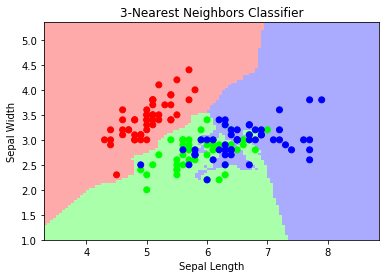

In [11]:
plot_boundaries(X, y, clf_knn, title="3-Nearest Neighbors Classifier")

## Logistic Regression

Let's try viewing the results from a logistic regression classifier.

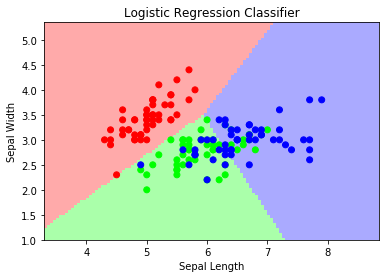

In [12]:
clf_lr = LogisticRegression(solver='lbfgs', multi_class='auto')
clf_lr.fit(X, y)

plot_boundaries(X, y, clf_lr, title="Logistic Regression Classifier")

## Perceptron

Let's try fitting an visualizing another classifier, the Perceptron.

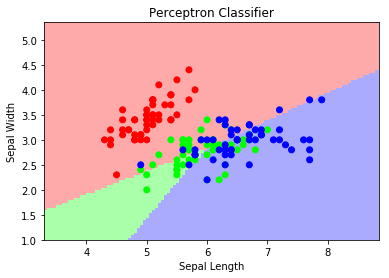

In [13]:
clf_per = Perceptron(max_iter=1000, tol=1e-3)
clf_per.fit(X, y)

plot_boundaries(X, y, clf_per, title="Perceptron Classifier")

Now, when building a model, we're typically interested in performance on data we haven't yet seen. A simple model that simply memorizes the training data may perform well on the data we've seen but poorly on unseen data. Unless we can evaluate a model on unseen data, we don't know how accurate its predictions may be.

To address this issue, we can separate the data into training and testing sets. We can fit the model on the training data and then evaluate it on the separate testing data. `sklearn` provides a convenient function to do this. Let's save 20% of our data for testing, and use the rest for fitting our models.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_knn.fit(X_train, y_train)
clf_per.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)
y_pred_per = clf_per.predict(X_test)

print(accuracy_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_per))

0.8333333333333334
0.6


Let's try viewing the online results of the perceptron classifier. As an iterative classifier, we can use `matplotlib`'s animation functions to view how the algorithm learns over the course of many iterations. *Note that FFmpeg is required.*

<IPython.core.display.Javascript object>


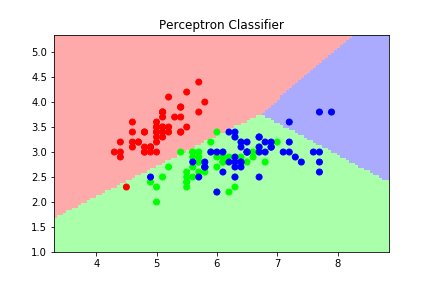

In [16]:
%matplotlib notebook

# Create color maps.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create a mesh of shape [x_min, m_max]x[y_min, y_max].
h = .05  # step size in the mesh
h = max(round(((X.max() - X.min()).max() / 1000) / h) * h, h)
x_min, x_max = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
y_min, y_max = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Set up the figure, the axis, and plot elements.
fig, ax = plt.subplots()
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("Perceptron Classifier")

def init():
    """Initialization function."""
    clf_per.partial_fit(X, y)

def animate(i):
    """Animation function. This is called sequentially."""
    clf_per.partial_fit(X, y)

    Z = clf_per.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points.
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)

    return ax

# Call the animator.
anim = animation.FuncAnimation(fig, func=animate, frames=2, init_func=init)

HTML(anim.to_html5_video());  # requires ffmpeg to be installed